In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def Relu(z):
    return np.maximum(0.01*z,z).astype('float64')

In [88]:
class layer:
    def __init__(self, input, units):
        self.alpha = 0.1
        self.input = input.astype('float64')
        self.weights = np.random.rand(units,self.input.shape[0]).astype('float64')
        #self.weights = np.array([1, 0.5, 1.9],[1, 1.2, 2.7])
        self.bias = np.random.rand(units,1).astype('float64')
        self.dz = 0
        self.dw = 0
        self.db = 0
        self.da = 0
        self.output = 0

    def forward(self):
        z = np.dot(self.weights, self.input) + self.bias
        #print(z.shape)
        self.output = sigmoid(z)
        return self.output
    
    def backward(self, dz, m, l):
        #print(dz)
        if l > 1:
            #derivative = self.input
            #derivative[derivative >= 0] = 1
            #derivative[derivative < 0] = 0.01
            #self.dz = np.multiply(np.dot(np.transpose(self.weights),dz),derivative)
            self.dz = np.multiply(np.dot(np.transpose(self.weights),dz),self.input*(1-self.input))
        self.db = 1/m*np.sum(dz, axis=1, keepdims=True)
        self.dw = 1 / m * np.dot(dz,np.transpose(self.input))
        self.weights = self.weights - self.alpha*self.dw
        self.bias = self.bias - self.alpha*self.db
        return self.dz

In [127]:
data = pd.read_csv("trainOr.csv", header=None)
data.head()
input = data[[0,1,2]].to_numpy()
input = input.T
input = input.astype('float64')
print(input)
output = data[3].to_numpy().astype('float64')
#print(output)


[[1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
  0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1.
  1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
  1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
  0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
  0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
  0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.
  0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
  0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
  0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
  1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.

In [128]:
print(input.shape)
print(output.shape)
alpha = 0.05

(3, 127)
(127,)


In [ ]:
a1 = np.random.rand(2,8)
a2 = np.random.rand(2,)
print(a1)
print(np.transpose(a2).shape)
print(np.add(np.dot(np.transpose(a1),a2),np.random.rand(8,)))

In [68]:
layer_1 = layer(input,4)
layer_2 = layer(layer_1.forward(),1)
A = layer_2.forward()
dA = -(output/A) + ((1 - output)/(1 - A))
der = A
der[der >= 0] = 1
der[der < 0] = 0.01
dZ = dA * der
#dZ = dA * A * (1 - A)

In [69]:
print(dZ)

[[ -0.73546963  -0.32401038  -0.73118277  -0.23892613  -0.28698556
   -0.70620128  -0.65564388  -0.26426123  -0.84881053  -1.41527188
   -1.09307962  -0.31151592  -0.31649541  -1.01093064  -0.95719269
   -0.30350845  -1.1207628   -0.7312974   -1.44960587  -0.27131601
  -49.90101129  -0.33061876  -0.25903437  -0.30370309  -0.64977494
   -0.86202859  -1.49122864  -0.57995168  -0.33808236  -0.77314769
   -0.58763139   1.57622701  -2.17841158  -0.30480141  -0.3936942
   -0.34839737  -0.50482688  -0.4979994   -0.43678805  -0.25387475
   -0.99437068  -0.28824994  -0.3296836   -0.5334764   -0.68303003
   -0.29183211  -0.4536988   -0.57646833  -0.59637341  -0.31286105
   -0.3172245   -1.75029529  -0.56644835  -0.35104652  -1.08501344
   -0.77215316  -0.66813172  -0.25336212  -1.28339509  -0.24386694
   -0.36005033  -0.26274254  -1.07451397  -0.57791586  -1.76034944
   -0.72871881  -0.31132277  -0.85563829  -0.6040199   -2.04711677
    9.56788901  -0.25576027  -0.27433315  -0.27317183  -0.66148

In [129]:
layer_1 = layer(input,4)
layer_2 = layer(layer_1.forward(),1)
m = input.shape[1]
loss = []
l = 0
for i in range(1500):
    A = layer_2.forward()
    dA = -(output/A) + ((1 - output)/(1 - A))
    #der = A
    #der[der >= 0] = 1
    #der[der < 0] = 0.01
    #dZ = dA * der
    dZ = dA * A * (1 - A)
    l =  1/m*np.sum(-output*np.log(A)-(1-output)*np.log(1-A))
    loss.append(l)
    dz1 = layer_2.backward(dZ.astype('float64'), m, 2)
    layer_1.backward(dz1.astype('float64'),m, 1)
    

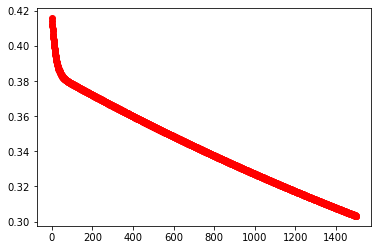

In [130]:
#loss = np.array(loss)
#print(loss)
#plt.ylim(0,np.max(loss))
plt.plot(loss, 'ro')
plt.draw()

In [131]:
input_test = [[1,1,1],[1,0,0],[0,0,0],[0,1,0],[0,0,0],[0,0,1]]
input_test = np.array(input_test).T
print(input_test.shape)
layer_1.input = input_test
layer_2.input = layer_1.forward()
print(layer_2.forward())

(3, 6)
[[0.96556494 0.75800811 0.24989329 0.85297152 0.24989329 0.80906039]]


In [52]:
array = np.array([1,-2,0,4,0,0,2,0,6,-5,0]).astype('float64')
array[array >= 0] = 1
array[array < 0] = 0.01
print(array)

[1.   0.01 1.   1.   1.   1.   1.   1.   1.   0.01 1.  ]
